In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from scipy.stats import truncexpon
from scipy.stats import pareto
import random
import scipy.integrate as spint
import math

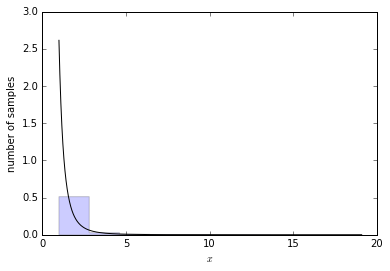

In [293]:
#Для данной задания я выбираю распределение парето
#Распределение парето имеет коэффициент. Обозначим его как b и присвоим ему значение:
b = 2.62
#Сгенерируем из распределения парето выборку объёма 1000
r = pareto.rvs(b, size=1000)
#сделаем дубликат
r0=r
#отсортируем дубликат
r0.sort()
#Создадим область для графиков
fig, ax = plt.subplots(1, 1)
#Построим гитограмму из элементов выборки
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
#Нарисуем плотность распределения
ax.plot(r0, pareto.pdf(r0,b), 'k-')
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.show()

In [294]:
#Определим функцию для расчета выборочного среднего из выборки r при n значениях сгенерированных i раз
def CLT(n, r, i):
    c = 0
    f = np.empty(0)
    while c<=i:
        ch = np.random.choice(r,n)
        av = np.average(ch)
        f = np.append(f,av)
        c=c+1
    return f  

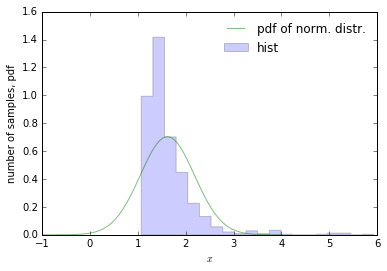

In [295]:
#Сгенерируем выборку для n=5
n=5
#Воспользуемся функцией для создания массива из выборочных средних
x5 = CLT(n,r,1000)
#Найдем среднее значение и дисперсию полученного нормального распределения, используя характеристики распределения парето и 
#центральную предельную теорему:
sigma2 = (1/(b-1)**2)*(b/(b-2)) #Расчет дисперсии распределения парето
sigma2N = sigma2/n #Расчет дисперсии полученного нормального распределения
sigmaN = math.sqrt(sigma2N) #Расчет стандартного отклонения нормального распределения
ma = b/(b-1) #Расчет математического ожидания нормального распределения
#Сформируем массивы данных для построения графика полученного нормального распределения
x = np.linspace(-1,4,1000) #В распределении парето y=0 при x<1. Для получения симметричного НР сформируем x от -1 до 4
norm_rv = sts.norm(ma,sigmaN)#Создадим объект нормального распределения с рассчитанными выше параметрами
pdf = norm_rv.pdf(x)
fig, ax = plt.subplots(1, 1)
#построим гистограмму распределений выборочных средних
ax.hist(x5, normed=True,bins=20, histtype='stepfilled', alpha=0.2, label='hist')
#Нарисуем график нормального распределения с рассчитанными выше параметрами
ax.plot(x, pdf, alpha=0.5, label='pdf of norm. distr.')
plt.ylabel('number of samples, pdf')
plt.xlabel('$x$')
ax.legend(loc='best', frameon=False)
plt.show()

## При n=5 гистограмма еще далека от нормального распределения и симметрии

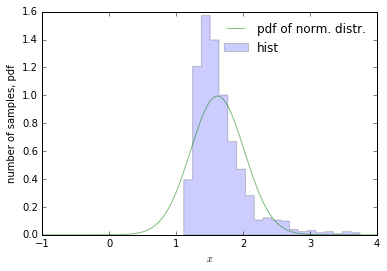

In [296]:
#Сгенерируем выборку для n=10
n=10
#Воспользуемся функцией для создания массива из выборочных средних
x5 = CLT(n,r,1000)
#Найдем среднее значение и дисперсию полученного нормального распределения, используя характеристики распределения парето и 
#центральную предельную теорему:
sigma2 = (1/(b-1)**2)*(b/(b-2)) #Расчет дисперсии распределения парето
sigma2N = sigma2/n #Расчет дисперсии полученного нормального распределения
sigmaN = math.sqrt(sigma2N) #Расчет стандартного отклонения нормального распределения
ma = b/(b-1) #Расчет математического ожидания нормального распределения
#Сформируем массивы данных для построения графика полученного нормального распределения
x = np.linspace(-1,4,1000) #В распределении парето y=0 при x<1. Для получения симметричного НР сформируем x от -1 до 4
norm_rv = sts.norm(ma,sigmaN)#Создадим объект нормального распределения с рассчитанными выше параметрами
pdf = norm_rv.pdf(x)
fig, ax = plt.subplots(1, 1)
#построим гистограмму распределений выборочных средних
ax.hist(x5, normed=True,bins=20, histtype='stepfilled', alpha=0.2, label='hist')
#Нарисуем график нормального распределения с рассчитанными выше параметрами
plt.plot(x, pdf, label='pdf of norm. distr.', alpha=0.5)
plt.ylabel('number of samples, pdf')
plt.xlabel('$x$')
ax.legend(loc='best', frameon=False)
plt.show()

## При n=10 гистограмма уже напоминает нормальное распределения

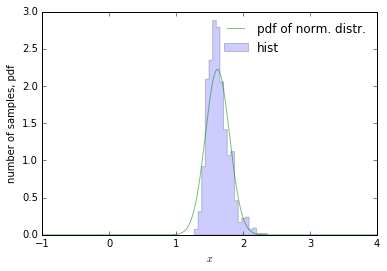

In [297]:
#Сгенерируем выборку для n=50
n=50
#Воспользуемся функцией для создания массива из выборочных средних
x5 = CLT(n,r,1000)
#Найдем среднее значение и дисперсию полученного нормального распределения, используя характеристики распределения парето и 
#центральную предельную теорему:
sigma2 = (1/(b-1)**2)*(b/(b-2)) #Расчет дисперсии распределения парето
sigma2N = sigma2/n #Расчет дисперсии полученного нормального распределения
sigmaN = math.sqrt(sigma2N) #Расчет стандартного отклонения нормального распределения
ma = b/(b-1) #Расчет математического ожидания нормального распределения
#Сформируем массивы данных для построения графика полученного нормального распределения
x = np.linspace(-1,4,1000) #В распределении парето y=0 при x<1. Для получения симметричного НР сформируем x от -1 до 4
norm_rv = sts.norm(ma,sigmaN)#Создадим объект нормального распределения с рассчитанными выше параметрами
pdf = norm_rv.pdf(x)
fig, ax = plt.subplots(1, 1)
#построим гистограмму распределений выборочных средних
ax.hist(x5, normed=True,bins=20, histtype='stepfilled', alpha=0.2,label='hist')
#Нарисуем график нормального распределения с рассчитанными выше параметрами
plt.plot(x, pdf, label='pdf of norm. distr.', alpha=0.5)
plt.ylabel('number of samples, pdf')
plt.xlabel('$x$')
ax.legend(loc='best', frameon=False)
plt.show()

## При n=50 гистограмма близка к симметричной, но т.к. распределение скошенное, полной симметрии не достичь

# Выводы: С уваличением n точность аппроксимации распределения выборочных средних нормальным повывашется. Центральная предельная теорема работает 